### Data_Loading_and_Exploration

##### Import Required Librarries

###### Basic Python Libraries

In [2]:
import os                # for file path operation 
import warnings    #to ignore warnings
warnings.filterwarnings('ignore')

###### Data manipulation and analysis

In [3]:
import pandas as pd
import numpy as np

###### Data Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Exploratory Data Analysis

In [5]:
from scipy import stats 
from scipy.stats import skew,kurtosis

###### Data Cleaning Helpers 

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

###### Mysql connection(Load Stage)

In [7]:
import mysql.connector
from sqlalchemy import create_engine

In [8]:
print("Finally all required libraries are imported now...")

Finally all required libraries are imported now...


##### Set Folder path

In [9]:
Folder_path=r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data"

###### Load all csv files

In [10]:
campaigns=pd.read_csv(os.path.join(Folder_path,"dataset_fashion_store_campaigns.csv"))
channels=pd.read_csv(os.path.join(Folder_path,"dataset_fashion_store_channels.csv"))
customers=pd.read_csv(os.path.join(Folder_path,"dataset_fashion_store_customers.csv"))
products=pd.read_csv(os.path.join(Folder_path,"dataset_fashion_store_products.csv"))
sales=pd.read_csv(os.path.join(Folder_path,"dataset_fashion_store_sales.csv"))
salesitems=pd.read_csv(os.path.join(Folder_path,"dataset_fashion_store_salesitems.csv"))
stock=pd.read_csv(os.path.join(Folder_path,"dataset_fashion_store_stock.csv"))

#### Basic Exploratory Data Analyst(Check struture of each dataset)

In [11]:
for name,df in {
    "Campaigns":campaigns,
    "Channels":channels,
    "Customers":customers,
    "Products":products,
    "Sales":sales,
    "Salesitems":salesitems,
    "Stock":stock
}.items():
    print(f"---{name}---")
    print(df.shape)                   #No. of rows/ columns
    print(df.isnull().sum())            #misssing value
    print(df.columns)                     # name oof column
    print()

---Campaigns---
(7, 7)
campaign_id       0
campaign_name     0
start_date        0
end_date          0
channel           0
discount_type     0
discount_value    0
dtype: int64
Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'discount_type', 'discount_value'],
      dtype='object')

---Channels---
(2, 2)
channel        0
description    0
dtype: int64
Index(['channel', 'description'], dtype='object')

---Customers---
(1000, 4)
customer_id    0
country        0
age_range      0
signup_date    0
dtype: int64
Index(['customer_id', 'country', 'age_range', 'signup_date'], dtype='object')

---Products---
(500, 9)
product_id       0
product_name     0
category         0
brand            0
color            0
size             0
catalog_price    0
cost_price       0
gender           0
dtype: int64
Index(['product_id', 'product_name', 'category', 'brand', 'color', 'size',
       'catalog_price', 'cost_price', 'gender'],
      dtype='object')

---Sales---
(905, 7)


In [12]:
#### Normality and outlier check in each table(for numeric col)

In [13]:
campaigns.info()           # there is no need to check normality ,outliers(bcz numeric cl is id nd it is unique)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     7 non-null      int64 
 1   campaign_name   7 non-null      object
 2   start_date      7 non-null      object
 3   end_date        7 non-null      object
 4   channel         7 non-null      object
 5   discount_type   7 non-null      object
 6   discount_value  7 non-null      object
dtypes: int64(1), object(6)
memory usage: 524.0+ bytes


In [14]:
### check whether duplicates exists
campaigns.duplicated().sum()

0

In [15]:
channels.info()          # No numeric col is there 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   channel      2 non-null      object
 1   description  2 non-null      object
dtypes: object(2)
memory usage: 164.0+ bytes


In [16]:
### check whether duplicates exists
channels.duplicated().sum()

0

In [17]:
customers.info()   # again it an id no need to check 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1000 non-null   int64 
 1   country      1000 non-null   object
 2   age_range    1000 non-null   object
 3   signup_date  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [18]:
### check whether duplicates exists
customers.duplicated().sum()

0

In [19]:
products.info()   ## we have to check normality in this table bcz numeric column is there  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     500 non-null    int64  
 1   product_name   500 non-null    object 
 2   category       500 non-null    object 
 3   brand          500 non-null    object 
 4   color          500 non-null    object 
 5   size           500 non-null    object 
 6   catalog_price  500 non-null    float64
 7   cost_price     500 non-null    float64
 8   gender         500 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 35.3+ KB


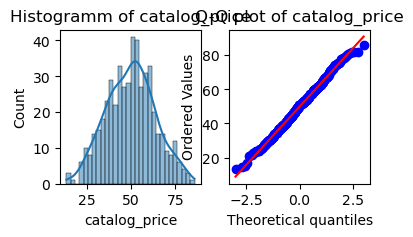

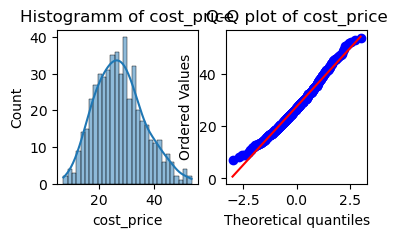

In [20]:
###Normality check 
col_name=['catalog_price','cost_price']
for col in col_name:
    plt.figure(figsize=(4,2))

    plt.subplot(1,2,1)
    sns.histplot(products[col],kde=True,bins=30)
    plt.title(f"Histogramm of {col}")

    plt.subplot(1,2,2)
    stats.probplot(products[col].dropna(),dist="norm",plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [21]:
# CHECK Via statistical method(Shapiro wilk test)
from scipy.stats import shapiro
for col in col_name:
    stat,p=shapiro(products[col].dropna())
    print(f"{col} -> p-value={p:.5f}")

catalog_price -> p-value=0.30908
cost_price -> p-value=0.00034


In [22]:
## For satisfaction we should to check otlier also 


In [23]:
##### Outlier detection 
for col in col_name:
    Q1=products[col].quantile(0.25)
    Q3=products[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 - 1.5*IQR
    outliers=products[(products[col]<lower) | (products[col]>upper)]
    print(f"{col}:{len(outliers)} outliers")

catalog_price:462 outliers
cost_price:468 outliers


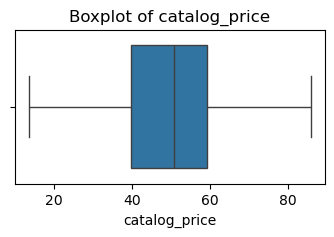

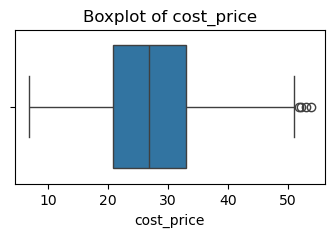

In [24]:
### outlier visual
for col in col_name:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=products[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [25]:
"""Although IQR-based method indicated many outliers, the normality plot and
   boxplot visualization confirmed a near-normal distribution with no significant
   extreme points. Hence, no outlier removal was performed for cost_price and catalog_price"""

'Although IQR-based method indicated many outliers, the normality plot and\n   boxplot visualization confirmed a near-normal distribution with no significant\n   extreme points. Hence, no outlier removal was performed for cost_price and catalog_price'

In [26]:
## handke duplicates if exists
products.duplicated().sum()

0

In [27]:
### check for another one(sales)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sale_id       905 non-null    int64  
 1   channel       905 non-null    object 
 2   discounted    905 non-null    int64  
 3   total_amount  905 non-null    float64
 4   sale_date     905 non-null    object 
 5   customer_id   905 non-null    int64  
 6   country       905 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 49.6+ KB


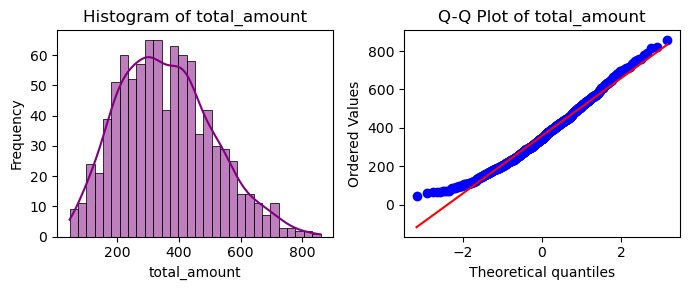

In [28]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Only include valid numeric columns (exclude IDs & binary)
col_name1 = ['total_amount']

for col in col_name1:
    plt.figure(figsize=(7, 3))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(sales[col].dropna(), kde=True, bins=30, color='purple')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(sales[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

    plt.tight_layout()
    plt.show()


In [29]:
#via statistical method (shapiro -wilk test)
from scipy.stats import shapiro
for col in col_name1:
    stat,p=shapiro(sales[col].dropna())
    print(f"{col} ->  p-value={p:.5f}")
    

total_amount ->  p-value=0.00000


In [30]:
#### Outlier detection
for col in col_name1:
    Q1=sales[col].quantile(0.25)
    Q3=sales[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 - 1.5*IQR
    outliers=sales[(sales[col]<lower) | (sales[col]>upper)]
    print(f"{col}:{len(outliers)} outliers")

total_amount:857 outliers


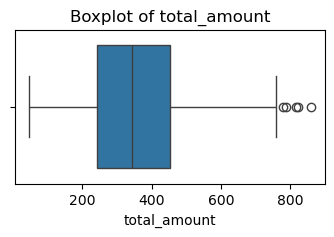

In [31]:
#### outlierss visual
for col in col_name1:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=sales[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [32]:
###outlier handling for total_amount(with IQR method)
for col in col_name1:
    Q1=sales[col].quantile(0.25)
    Q3=sales[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5*IQR
    sales[col]=np.where(sales[col]<lower,lower,sales[col])
    sales[col]=np.where(sales[col]>upper,upper,sales[col])

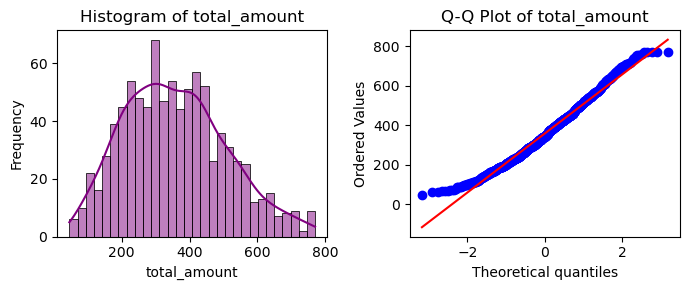

In [33]:
###now check again 
for col in col_name1:
    plt.figure(figsize=(7, 3))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(sales[col].dropna(), kde=True, bins=30, color='purple')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(sales[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

    plt.tight_layout()
    plt.show()

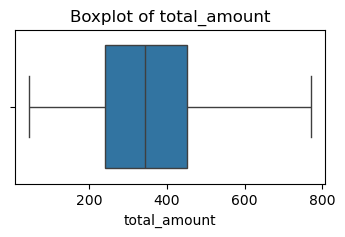

In [34]:
for col in col_name1:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=sales[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [35]:
"""Outliers in total_amount were handled using the IQR method
   by capping extreme values at the lower and upper bounds (no data removed)"""

'Outliers in total_amount were handled using the IQR method\n   by capping extreme values at the lower and upper bounds (no data removed)'

In [36]:
### check whether duplicates exists
sales.duplicated().sum()

0

In [37]:
### next table (salesitems)
salesitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            2253 non-null   int64  
 1   sale_id            2253 non-null   int64  
 2   product_id         2253 non-null   int64  
 3   quantity           2253 non-null   int64  
 4   original_price     2253 non-null   float64
 5   unit_price         2253 non-null   float64
 6   discount_applied   2253 non-null   float64
 7   discount_percent   2253 non-null   object 
 8   discounted         2253 non-null   int64  
 9   item_total         2253 non-null   float64
 10  sale_date          2253 non-null   object 
 11  channel            2253 non-null   object 
 12  channel_campaigns  2253 non-null   object 
dtypes: float64(4), int64(5), object(4)
memory usage: 228.9+ KB


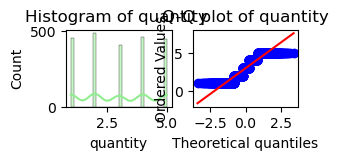

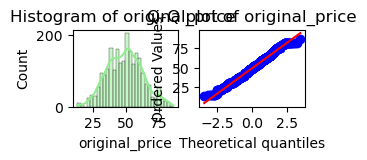

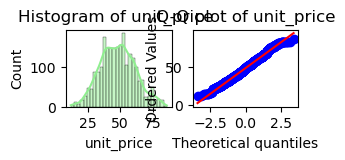

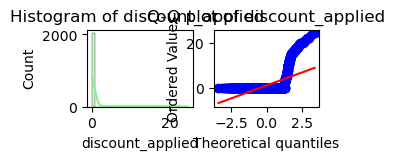

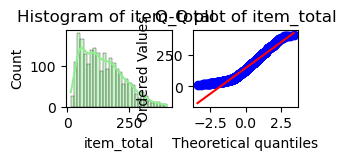

In [38]:
#### check normality for numeri (quantitative) cols in (salesitem ) table
col_name2=['quantity','original_price','unit_price','discount_applied','item_total']
for col in col_name2:
    plt.figure(figsize=(3,1))

    plt.subplot(1,2,1)
    sns.histplot(salesitems[col],kde=True,bins=30,color='lightgreen')
    plt.title(f"Histogram of {col} ")

    plt.subplot(1,2,2)
    stats.probplot(salesitems[col].dropna(),dist='norm',plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [39]:
"""The quantity column was not subjected to outlier handling since all its values lie within a consistent range (1 to 4),
indicating no presence of extreme or abnormal values."""  ## and we don't need to check outliers of original_price or unit price it looks normal

'The quantity column was not subjected to outlier handling since all its values lie within a consistent range (1 to 4),\nindicating no presence of extreme or abnormal values.'

In [40]:
"""The discount_applied column contained mostly zero values with few unusually high discounts. Outliers were capped using the IQR method to prevent
skewness and maintain data consistency"""

'The discount_applied column contained mostly zero values with few unusually high discounts. Outliers were capped using the IQR method to prevent\nskewness and maintain data consistency'

In [41]:
#### outlier detection for (item_total,discount applied,unit_price)
col_name3=['unit_price','discount_applied','item_total']
for col in col_name3:
    Q1=salesitems[col].quantile(0.25)
    Q3=salesitems[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5*IQR
    outliers=salesitems[(salesitems[col]<lower) | (salesitems[col]>upper)]
    print(f"{col}:{len(outliers)} outliers") 

unit_price:1 outliers
discount_applied:222 outliers
item_total:8 outliers


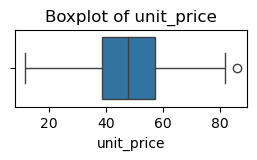

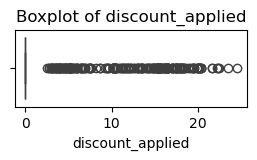

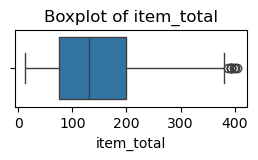

In [42]:
### outliers visualization(Boxplots)
for col in col_name3:
    plt.figure(figsize=(3,1))
    sns.boxplot(x=salesitems[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [43]:
### Outlier handling(for numeric cols)

In [44]:
#capping(it is best for analysis)
for col in col_name3:
    Q1=salesitems[col].quantile(0.25)
    Q3=salesitems[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5*IQR
    salesitems[col]=np.where(salesitems[col]<lower,lower,salesitems[col])
    salesitems[col]=np.where(salesitems[col]>upper,upper,salesitems[col])

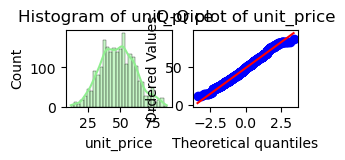

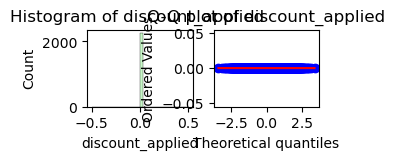

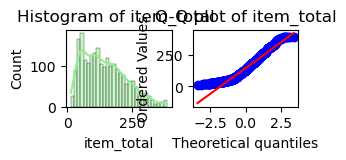

In [45]:
col_name3=['unit_price','discount_applied','item_total']
for col in col_name3:
    plt.figure(figsize=(3,1))

    plt.subplot(1,2,1)
    sns.histplot(salesitems[col],kde=True,bins=30,color='lightgreen')
    plt.title(f"Histogram of {col} ")

    plt.subplot(1,2,2)
    stats.probplot(salesitems[col].dropna(),dist='norm',plot=plt)
    plt.title(f"Q-Q plot of {col}")

    plt.show()

In [46]:
###The boxplot for discount_applied showed a vertical alignment after applying the IQR method, indicating that most values are clustered around zero. 
#This confirms that extreme discounts were successfully capped, resulting in a stable distribution

In [47]:
###Outlier handling was performed on key numeric columns using the IQR method. 
#Extreme values were capped where necessary, and since the remaining data showed no significant deviations, 
#no further outlier treatment was required for the MySQL dataset

In [48]:
### check whether duplicates exists
salesitems.duplicated().sum()

0

In [49]:
### Now check for another one(stock)
stock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         1000 non-null   object
 1   product_id      1000 non-null   int64 
 2   stock_quantity  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


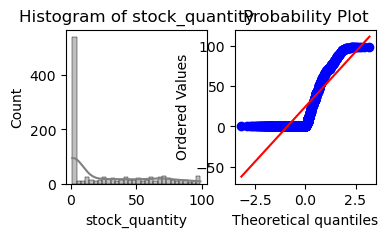

In [50]:
##### SO normality check for numeric(stock_quantity) not for id
col_name4=['stock_quantity']
for col in col_name4:
    plt.figure(figsize=(4,2))

    plt.subplot(1,2,1)
    sns.histplot(stock[col],kde=True,bins=30,color='grey')
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    stats.probplot(stock[col].dropna(),dist='norm',plot=plt)
    plt.show()

In [51]:
### via statistical method 
for col in col_name4:
    stat,p=shapiro(stock[col].dropna())
    print(f"{col} ->= {p:.5f}")

stock_quantity ->= 0.00000


In [52]:
### outlier check
for col in col_name4:
    Q1=stock[col].quantile(0.25)
    Q3=stock[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5*IQR
    outliers=stock[(stock[col]<lower) | (stock[col]>upper)]
    print(f"{col}:{len(outliers)}outliers")


stock_quantity:0outliers


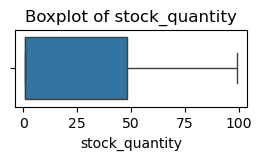

In [53]:
### visual 
for col in col_name4:
    plt.figure(figsize=(3,1))
    sns.boxplot(x=stock[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [54]:
'''Stock Quantity is highly right-skewed but contains no statistical outliers'''

'Stock Quantity is highly right-skewed but contains no statistical outliers'

In [55]:
### check whether duplicates exists
stock.duplicated().sum()

0

In [56]:
#### Explort cleaned data in the csv file
campaigns.to_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\campaigns_cleaned.csv",index=False)
channels.to_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\channels_cleaned.csv",index=False)
customers.to_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\customer_cleaned.csv",index=False)
products.to_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\products_cleaned.csv",index=False)
sales.to_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\sales_cleaned.csv",index=False)
salesitems.to_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\salesitems_cleaned.csv",index=False)
stock.to_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\stock_cleaned.csv",index=False)
                    

#### Data is imported in mysql via python 

In [57]:
import pandas as pd
import mysql.connector

In [58]:
#### cleaned file path(for campaigns)
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\campaigns_cleaned.csv")

#### Connect to Mysql

In [59]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="ecommerce_europeanfashion"
)
cursor=conn.cursor()

In [60]:
print(df.columns)

Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'discount_type', 'discount_value'],
      dtype='object')


In [61]:
df.rename(columns={
    'campaign_id':'campaign_id',
    'campaign_name':'campaign_name',
    'start_date':'start_date',
    'end_date':'end_date',
    'channel':'channel',
    'discount_type':'discount_type',
    'discount_value':'discount_value'
},inplace=True)

In [62]:
print(df.head())

   campaign_id          campaign_name  start_date    end_date       channel  \
0            1      Spring Flash Sale  2025-04-01  2025-04-07         Email   
1            2       Easter Promotion  2025-04-08  2025-04-15  Social Media   
2            3  Mother's Day Campaign  2025-05-01  2025-05-09         Email   
3            4   Mid-Season Clearance  2025-05-10  2025-05-19    App Mobile   
4            5              TIVA Week  2025-05-20  2025-05-31  Social Media   

  discount_type discount_value  
0    Percentage         10.00%  
1         Fixed             10  
2    Percentage         25.00%  
3    Percentage         30.00%  
4    Percentage         30.00%  


In [63]:
#### Insert data (movies)
for i,row in df.iterrows():
    cursor.execute("""
         INSERT INTO campaigns (campaign_id,campaign_name,start_date,end_date,channel,discount_type,discount_value)
         VALUES (%s,%s,%s,%s,%s,%s,%s)
    """,(
        row['campaign_id'],
        row['campaign_name'],
        row['start_date'],
        row['end_date'],
        row['channel'],
        row['discount_type'],
        row['discount_value']
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

IntegrityError: 1062 (23000): Duplicate entry '1' for key 'campaigns.PRIMARY'

In [ ]:
#### cleaned file path(for channels)
df2=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\channels_cleaned.csv")

In [ ]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="ecommerce_europeanfashion"
)
cursor=conn.cursor()

In [ ]:
print(df2.columns)

In [ ]:
df2.rename(columns={
    'channel':'channel',
    'description':'description'
}, inplace=True)

In [ ]:
print(df2.head())

In [ ]:
#### Insert data (chqannels)
for i,row in df2.iterrows():
    cursor.execute("""
         INSERT INTO channels (channel,description)
         VALUES (%s,%s)
    """,(
        row['channel'],
        row['description']
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

In [ ]:
#### cleaned file path(for customers )
df3=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\customer_cleaned.csv")

In [ ]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="ecommerce_europeanfashion"
)
cursor = conn.cursor()

In [ ]:
print(df3.columns)

In [ ]:
df3.rename(columns={
    'customer_id':'customer_id',
    'country':'country',
    'age_range':'age_range',
    'signup_date':'signup_date'

}, inplace=True)

In [ ]:
print(df3.head())

In [ ]:
#### Insert data (cutomers)
for i,row in df3.iterrows():
    cursor.execute("""
         INSERT INTO customers (customer_id,country,age_range,signup_date)
         VALUES (%s,%s,%s,%s)
    """,(
        row['customer_id'],
        row['country'],
        row['age_range'],
        row['signup_date'],

    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

In [ ]:
#### cleaned file path(for products)
df4=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\products_cleaned.csv")

In [ ]:
print(df4.columns)

In [ ]:
df4.rename(columns={
    'product_id':'product_id',
    'product_name':'product_name',
    'category':'category',
    'brand':'brand',
    'color':'color',
    'size':'size',
    'catalog_price':'catalog_price',
    'cost_price':'cost_price',
    'gender':'gender'
}, inplace=True)

In [ ]:
df4.head()

In [ ]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="ecommerce_europeanfashion"
)
cursor = conn.cursor()

In [ ]:
#### Insert data (movies_year)
for i,row in df4.iterrows():
    cursor.execute("""
         INSERT INTO products (product_id,product_name,category,brand,color,size,catalog_price,cost_price,gender)
         VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """,(
        row['product_id'],
        row['product_name'],
        row['category'],
        row['brand'],
        row['color'],
        row['size'],
        row['catalog_price'],
        row['cost_price'],
        row['gender']
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

In [66]:
#### Insert data into (sales)
df5=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\sales_cleaned.csv")

In [67]:
df5.columns

Index(['sale_id', 'channel', 'discounted', 'total_amount', 'sale_date',
       'customer_id', 'country'],
      dtype='object')

In [68]:
df5.rename(columns={
    'sale_id':'sale_id',
    'channel':'channel',
    'discounted':'discounted',
    'total_amount':'total_amount',
    'sale_date':'sale_date',
    'customer_id':'customer_id',
    'country':'country'   
}, inplace=True)

In [69]:
df5.head()

,sale_id,channel,discounted,total_amount,sale_date,customer_id,country
0,10,E-commerce,0,299.70,2025-05-21,195,France
1,100,App Mobile,0,681.05,2025-04-21,518,Germany
2,1000,E-commerce,0,324.50,2025-05-20,439,Germany
3,1001,E-commerce,0,287.85,2025-04-05,349,Germany
4,1003,App Mobile,0,430.64,2025-06-06,727,Portugal


In [70]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="ecommerce_europeanfashion"
)
cursor = conn.cursor()

In [72]:
#### Insert data (sales)
for i,row in df5.iterrows():
    cursor.execute("""
         INSERT INTO sales (sale_id,channel,discounted,total_amount,sale_date,customer_id,country)
         VALUES (%s,%s,%s,%s,%s,%s,%s)
    """,(
        row['sale_id'],
        row['channel'],
        row['discounted'],
        row['total_amount'],
        row['sale_date'],
        row['customer_id'],
        row['country']
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!


In [73]:
### insert data into (salesitems)
df6=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\EcommerceEuropeanFashion_project(mysql,Python(ETL),Power bi)\data\cleaned_data\salesitems_cleaned.csv")


In [74]:
df6.columns

Index(['item_id', 'sale_id', 'product_id', 'quantity', 'original_price',
       'unit_price', 'discount_applied', 'discount_percent', 'discounted',
       'item_total', 'sale_date', 'channel', 'channel_campaigns'],
      dtype='object')

In [76]:
df6.rename(columns={
    'item_id':'item_id',
    'sale_id':'sale_id',
    'product_id':'product_id',
    'quantity':'quantity',
    'original_price':'original_price',
    'unit_price':'unit_price',
    'discount_applied':'discount_applied',
    'discount_percent':'discount_percent',
    'discounted':'discounted',
    'item_total':'item_total',
    'sale_date':'sale_date',
    'channel':'channel',
    'channel_campaigns':'channel_campaigns'
}, inplace=True)

In [81]:
df6.head()

,item_id,sale_id,product_id,quantity,original_price,unit_price,discount_applied,discount_percent,discounted,item_total,sale_date,channel,channel_campaigns
0,2270,658,403,1,81.80,81.80,0.0,0.00%,0,81.80,2025-06-16,App Mobile,App Mobile
1,1170,336,284,1,81.79,81.79,0.0,0.00%,0,81.79,2025-06-17,E-commerce,Website Banner
2,2496,1255,71,1,80.76,80.76,0.0,0.00%,0,80.76,2025-04-16,App Mobile,App Mobile
3,1273,331,98,1,78.52,78.52,0.0,0.00%,0,78.52,2025-05-06,App Mobile,App Mobile
4,1829,1079,98,1,78.52,78.52,0.0,0.00%,0,78.52,2025-06-15,App Mobile,App Mobile


In [77]:
conn=mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@priya123#ni56",
    database="ecommerce_europeanfashion"
)
cursor = conn.cursor()

In [80]:
#### Insert data (salesitems)
for i,row in df6.iterrows():
    cursor.execute("""
         INSERT INTO salesitems (item_id,sale_id,product_id,quantity,original_price,unit_price,discount_applied,discount_percent,discounted,item_total,sale_date,channel,channel_campaigns)
         VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """,(
        row['item_id'],
        row['sale_id'],
        row['product_id'],
        row['quantity'],
        row['original_price'],
        row['unit_price'],
        row['discount_applied'],
        row['discount_percent'],
        row['discounted'],
        row['item_total'],
        row['sale_date'],
        row['channel'],
        row['channel_campaigns']
        
    ))
        
conn.commit()
print("Data imported succesfully!")
cursor.close()
conn.close()

Data imported succesfully!
